In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

/home/karan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [9]:
diab=pd.read_csv("diabetes.csv")

In [10]:
diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [11]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [12]:
diab.isnull().values.any()

False

In [13]:
diab.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

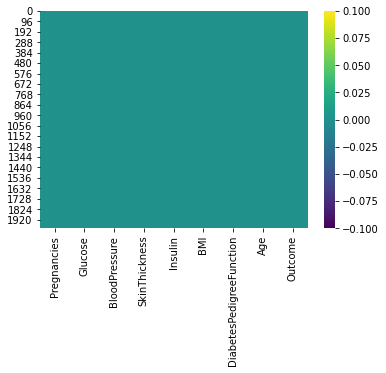

In [27]:
sns.heatmap(diab.isnull(),cmap="viridis")

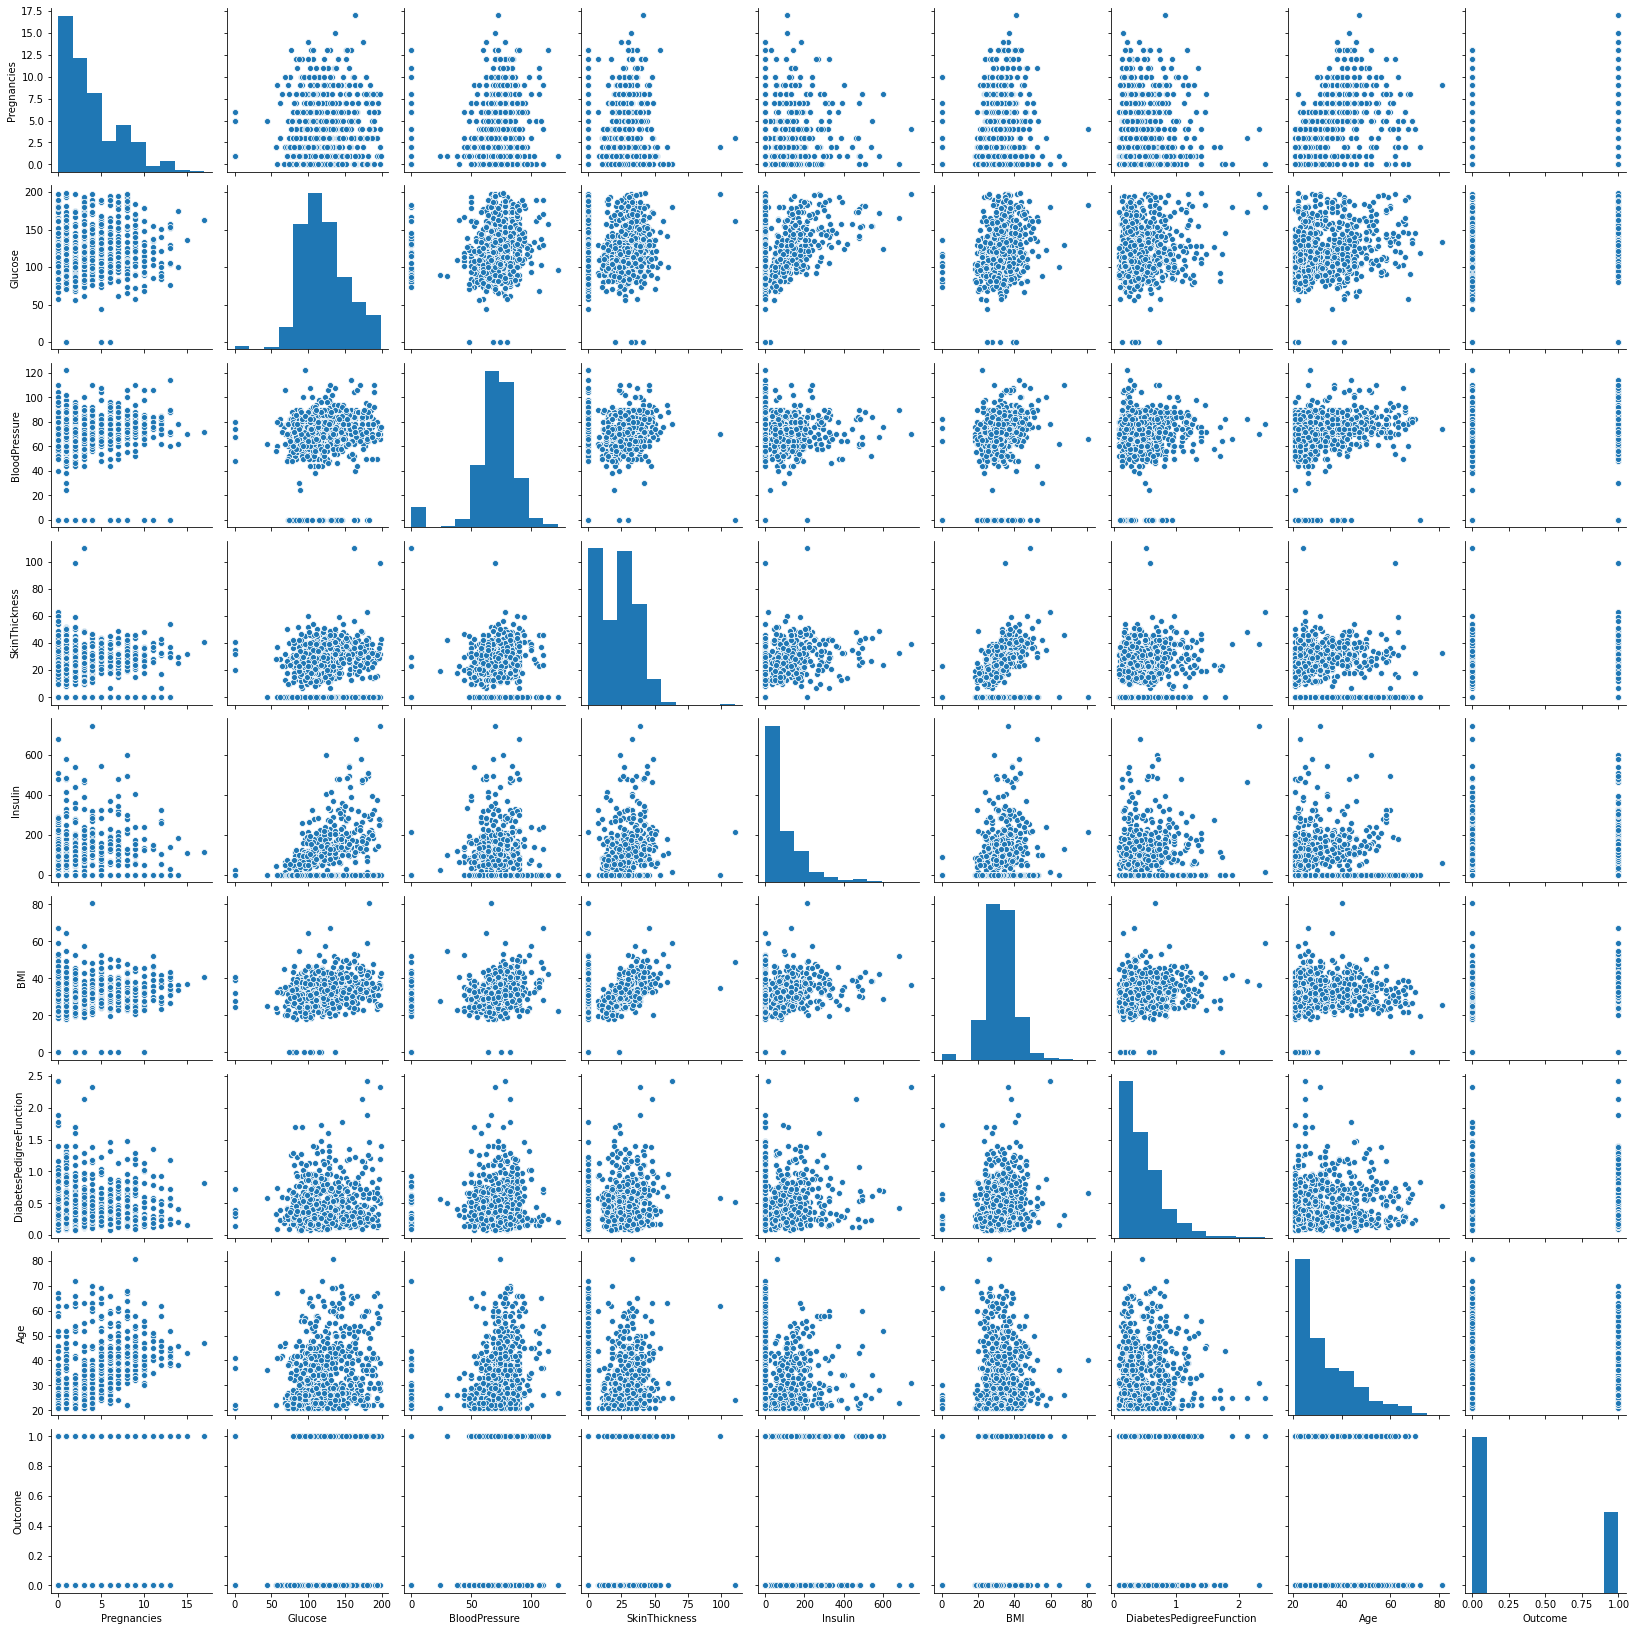

In [28]:
sns.pairplot(diab)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(diab.drop("Outcome",axis=1),diab['Outcome'],test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt=DecisionTreeClassifier()

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_predict=dt.predict(x_test)

In [22]:
y_test.head()

1706    1
1275    0
323     1
410     0
487     0
Name: Outcome, dtype: int64

In [23]:
y_predict[0:5]

array([1, 0, 1, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,y_predict)

array([[400,   7],
       [ 11, 182]])

In [26]:
(400+182)/(400+7+11+182)

0.97

In [ ]:
#0.97 accuracy